<a href="https://colab.research.google.com/github/SelinErcan/MachineLearning/blob/main/PCA_Implementation_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import svd, eig
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from numpy import diag
from numpy import zeros
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

## Part I: Implementing PCA

In [ ]:
def pca(X, k):
    U, s, Vh = svd(X, full_matrices=False)

    X_pca = U[:, :k]*s[:k]
    X_pca = (X_pca).round(2)
    print(X_pca.shape)
    return U, s, Vh, X_pca

Write the function pca(X) that takes an 𝑛×𝑛 matrix and returns mean, weights and vectors. The mean is the mean of the columns of X. The principle components of X are in vectors. The corresponding eigenvalues are in weights. You should use only a function performing SVD and nothing else from any Python libraries.  

## Part II: Using PCA before Classification

Using only a portion of the data (e.g., about 1000 images randomly chosen from the training set) perform PCA and train a classifier. 

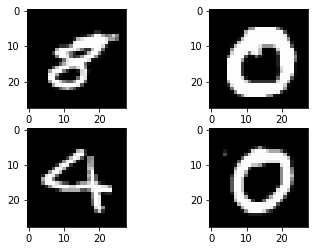

X shape: (1000, 784), y shape: (1000,)


In [ ]:
# load (downloaded if needed) the MNIST dataset. 1000 images randomly chosen from the training set
(X, y), (_, _) = mnist.load_data()

filter_indices = []
for i in range(1000):
    filter_indices.append(np.random.randint(0, len(X)))

X = X[filter_indices] 
y = y[filter_indices] 


# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

X = X.astype('float32') / 255.
X = X.reshape((len(X), np.prod(X.shape[1:])))
print("X shape: {}, y shape: {}".format(X.shape, y.shape))

Plot the class locations on the test data on a 2D map with horizontal axis as the first principal and with vertical axis as the second principal component (like the one discussed in class). Do the same for the first and third principal components. This should show you some clustering of the labels (better than if you just chose any two pixels). • Feed the reduced features to a Random Forest Decision tree and show classification results using cross-validation. You should use all the data in training. This should be repeated for a few number of components extracted by PCA.  

In [ ]:
def plot_pca(X, y):
    Xax=X[:,0]
    Yax=X[:,1]
    cdict={0:'blue', 1:'purple', 2:'pink', 3:'red', 4:'yellow', 5:'orange', 6:'green', 7:'brown', 8:'grey', 9:'black'}
    labl={0:'0',1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'}
    marker={0:'*',1:'o', 2:'p',3:'P',4:'^',5:'D',6:'+',7:'o',8:'8',9:'s'}
    
    fig,ax=plt.subplots(figsize=(10,7))
    fig.patch.set_facecolor('white')
    for l in np.unique(y):
        ix=np.where(y==l)
        ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40, label=labl[l],marker=marker[l])
    # for loop ends
    plt.xlabel("First Principal Component",fontsize=14)
    plt.ylabel("Second Principal Component",fontsize=14)
    plt.legend()
    plt.show()# please check the scatter plot of the remaining component and you will understand the difference

In [ ]:
def RF_PCA(X, y, pca_comp):
    U, s, Vh, X_pca = pca(X, pca_comp)
    print("New pca data: ", X_pca.shape)

    kf = KFold(n_splits=5, random_state=None, shuffle=True) #k-fold cross validation with value 10.
    split = kf.get_n_splits(X)
    print(kf) 

    accuracies = []

    for train_index, test_index in kf.split(X):

        print('\n------------------------------------------------------\n')

        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y[train_index], y[test_index]

        plot_pca(X_test,y_test)

        rf = RandomForestClassifier(n_estimators = 50)
        rf.fit(X_train,y_train)
        pred = rf.predict(X_test)
        count = 0

        accuracy = accuracy_score(y_test, pred) 
        print("Accuracy:", accuracy)
        accuracies.append(accuracy)

    print('\n------------------------------------------------------\n')
    print("\nMean accuracy: ",np.mean(accuracies))
    return np.mean(accuracies)
   

Test at least four different values for the number of components chosen.

(1000, 5)
New pca data:  (1000, 5)
KFold(n_splits=5, random_state=None, shuffle=True)

------------------------------------------------------



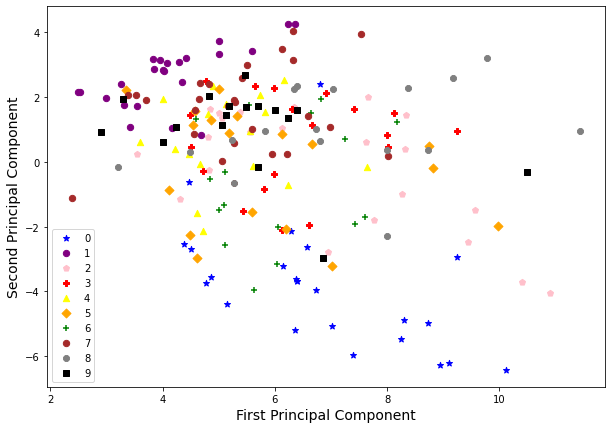

Accuracy: 0.705

------------------------------------------------------



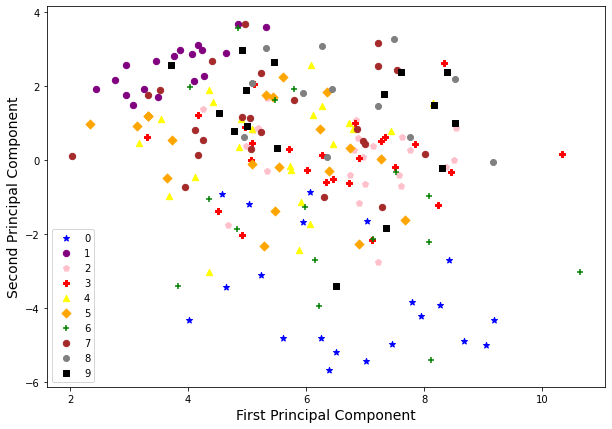

Accuracy: 0.675

------------------------------------------------------



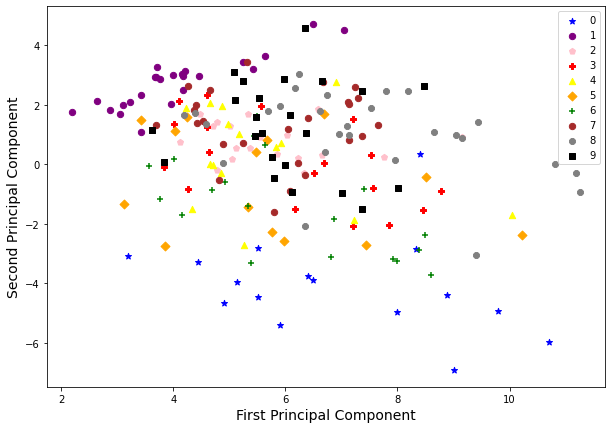

Accuracy: 0.65

------------------------------------------------------



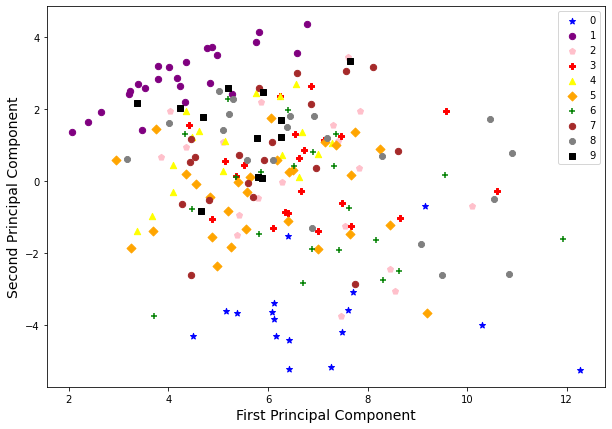

Accuracy: 0.69

------------------------------------------------------



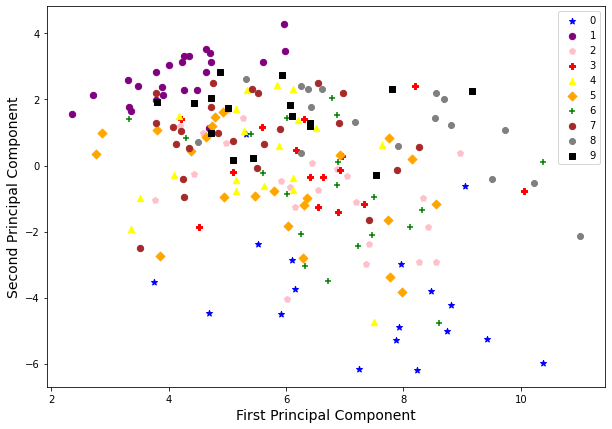

Accuracy: 0.67

------------------------------------------------------


Mean accuracy:  0.6779999999999999


In [ ]:
pca5_accuracy = RF_PCA(X,y, pca_comp=5)

(1000, 15)
New pca data:  (1000, 15)
KFold(n_splits=5, random_state=None, shuffle=True)

------------------------------------------------------



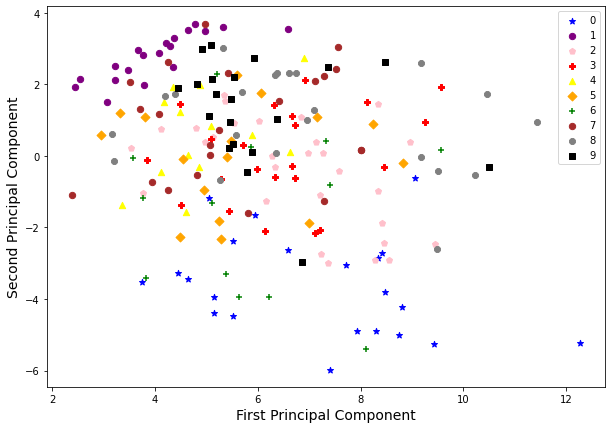

Accuracy: 0.845

------------------------------------------------------



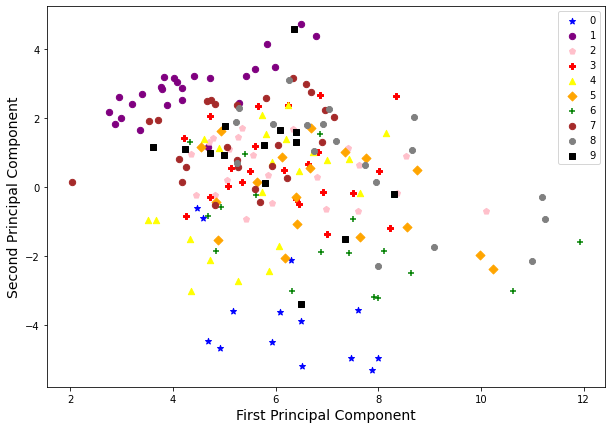

Accuracy: 0.855

------------------------------------------------------



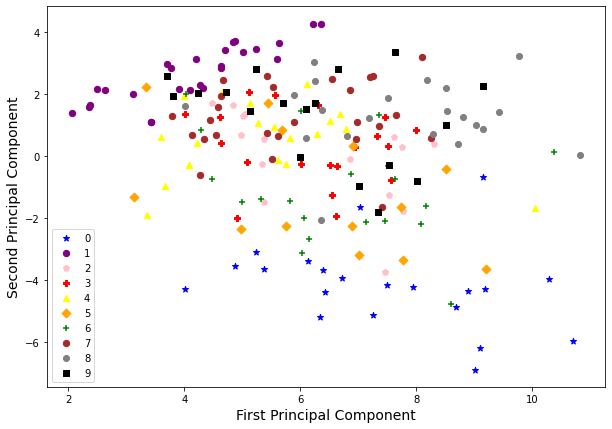

Accuracy: 0.865

------------------------------------------------------



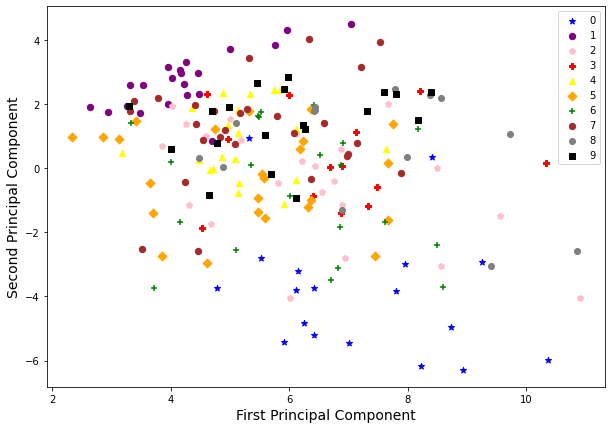

Accuracy: 0.815

------------------------------------------------------



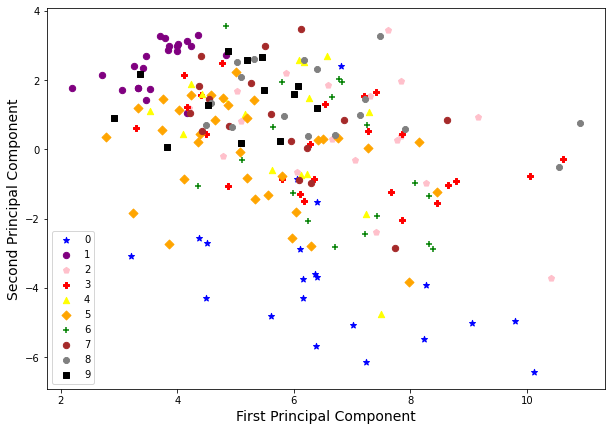

Accuracy: 0.82

------------------------------------------------------


Mean accuracy:  0.8400000000000001


In [ ]:
pca15_accuracy = RF_PCA(X,y, pca_comp=15)

(1000, 25)
New pca data:  (1000, 25)
KFold(n_splits=5, random_state=None, shuffle=True)

------------------------------------------------------



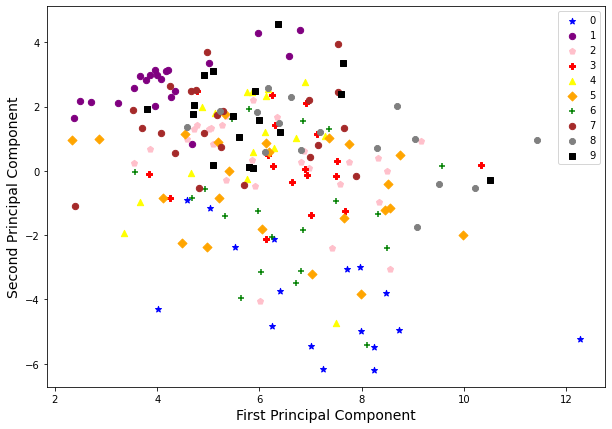

Accuracy: 0.855

------------------------------------------------------



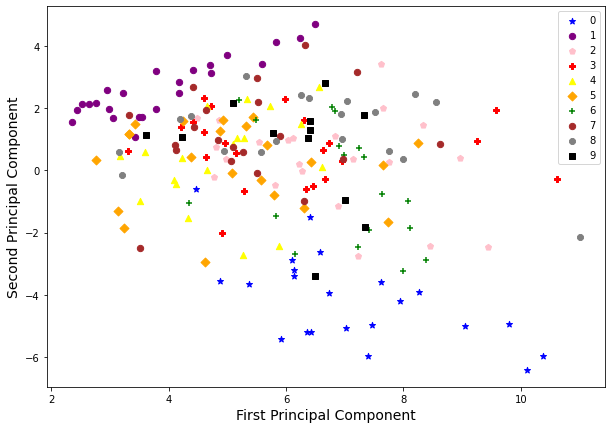

Accuracy: 0.835

------------------------------------------------------



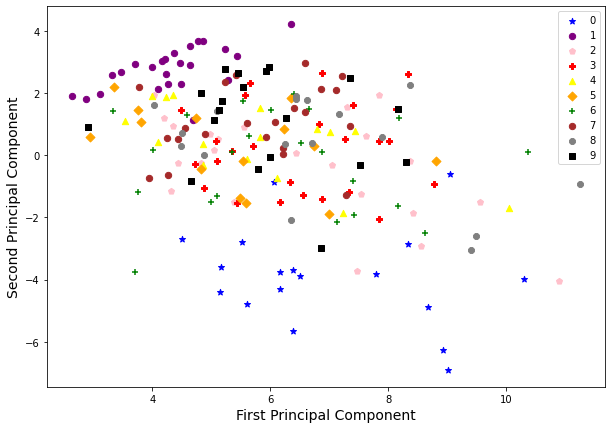

Accuracy: 0.87

------------------------------------------------------



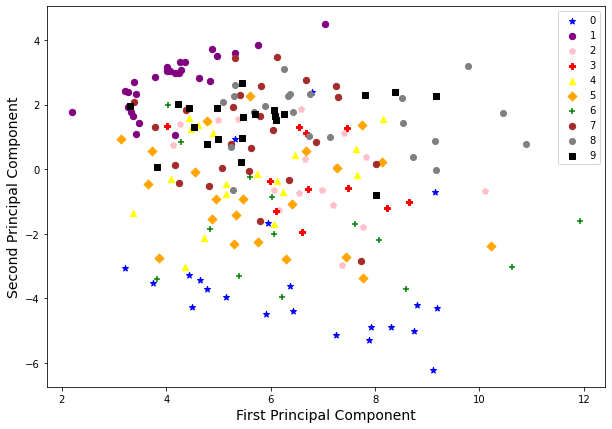

Accuracy: 0.865

------------------------------------------------------



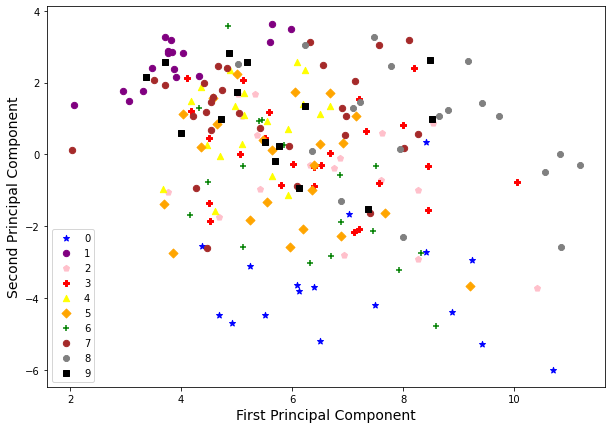

Accuracy: 0.87

------------------------------------------------------


Mean accuracy:  0.859


In [ ]:
pca25_accuracy = RF_PCA(X,y, pca_comp=25)

(1000, 50)
New pca data:  (1000, 50)
KFold(n_splits=5, random_state=None, shuffle=True)

------------------------------------------------------



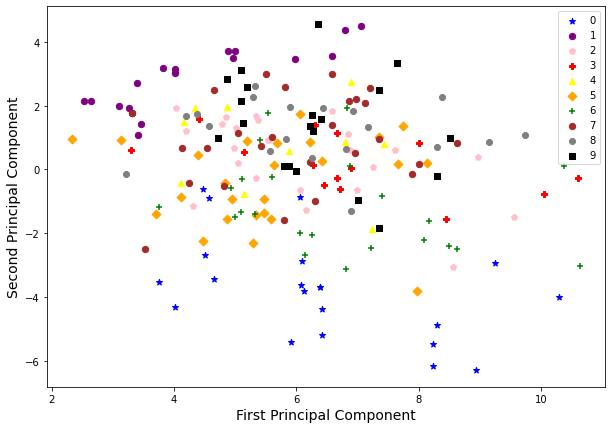

Accuracy: 0.82

------------------------------------------------------



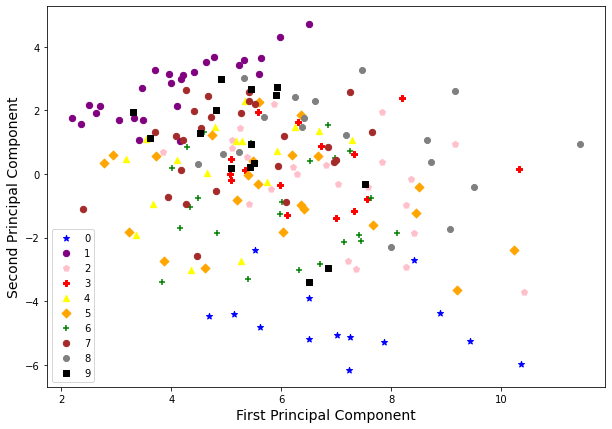

Accuracy: 0.87

------------------------------------------------------



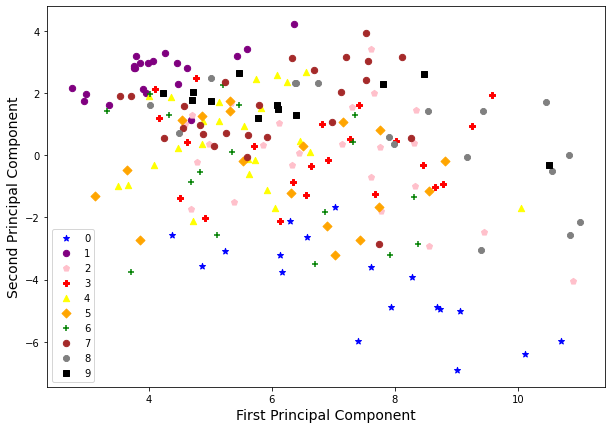

Accuracy: 0.855

------------------------------------------------------



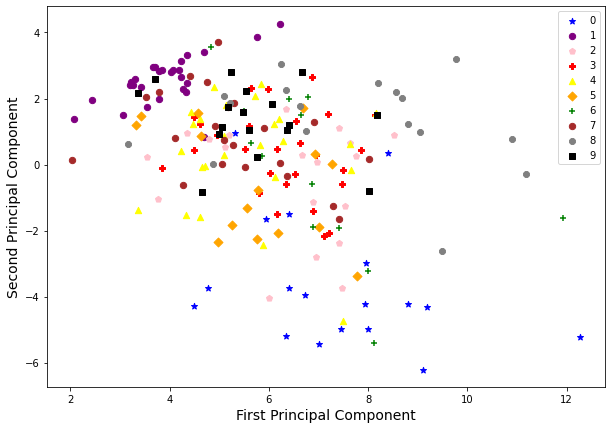

Accuracy: 0.885

------------------------------------------------------



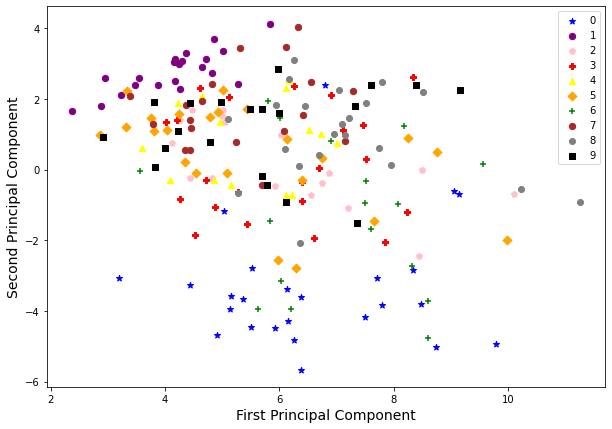

Accuracy: 0.835

------------------------------------------------------


Mean accuracy:  0.853


In [ ]:
pca50_accuracy = RF_PCA(X,y, pca_comp=50)

In [ ]:
print("PCA results; \n\tPCA 5  -> {} \n\tPCA 15 -> {} \n\tPCA 25 -> {} \n\tPCA 50 -> {}".format(pca5_accuracy, pca15_accuracy, pca25_accuracy, pca50_accuracy))

PCA results; 
	PCA 5  -> 0.6779999999999999 
	PCA 15 -> 0.8400000000000001 
	PCA 25 -> 0.859 
	PCA 50 -> 0.853


## Part III: Comparing Linear and Non-linear Versions of PCA



In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
def RF_KernelPCA(X, y, pca_comp):
    transformer = KernelPCA(n_components=7, kernel='linear')
    X_pca = transformer.fit_transform(X)
    print("New pca data: ", X_pca.shape)

    kf = KFold(n_splits=5, random_state=None, shuffle=True) #k-fold cross validation with value 10.
    split = kf.get_n_splits(X)
    print(kf) 

    accuracies = []

    for train_index, test_index in kf.split(X):

        print('\n------------------------------------------------------\n')

        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y[train_index], y[test_index]

        plot_pca(X_test,y_test)

        rf = RandomForestClassifier(n_estimators = 50)
        rf.fit(X_train,y_train)
        pred = rf.predict(X_test)
        count = 0

        accuracy = accuracy_score(y_test, pred) 
        print("Accuracy:", accuracy)
        accuracies.append(accuracy)

    print('\n------------------------------------------------------\n')
    print("\nMean accuracy: ",np.mean(accuracies))
    return np.mean(accuracies)
   

New pca data:  (1000, 7)
KFold(n_splits=5, random_state=None, shuffle=True)

------------------------------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


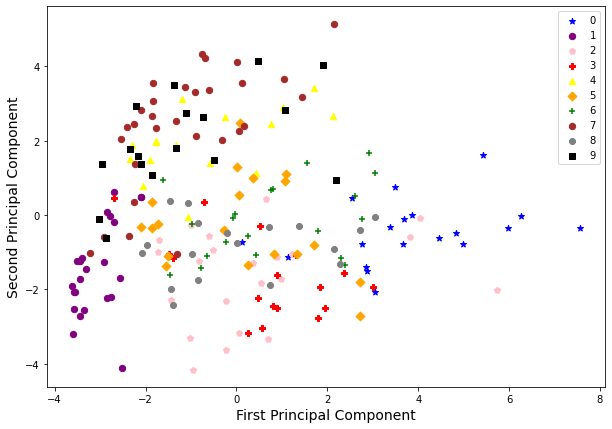

Accuracy: 0.8

------------------------------------------------------



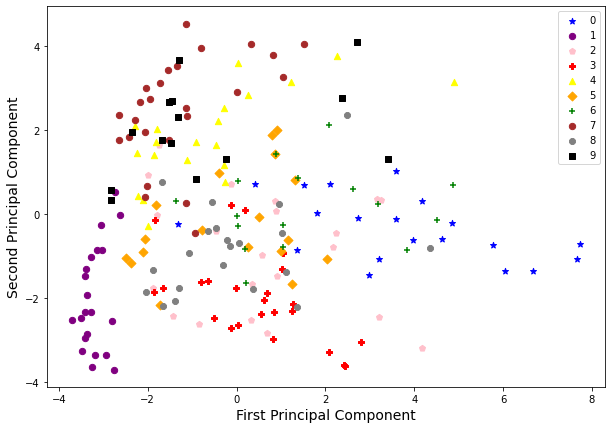

Accuracy: 0.815

------------------------------------------------------



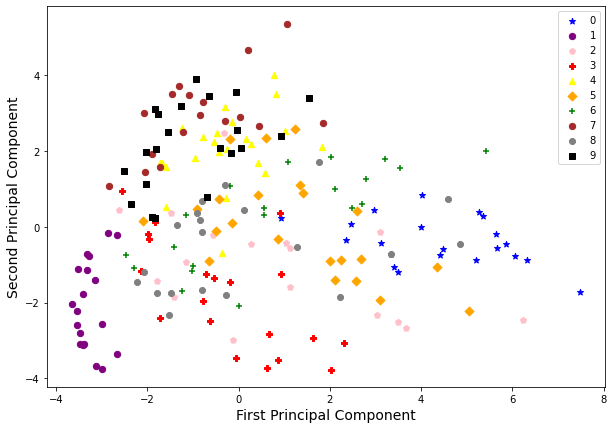

Accuracy: 0.785

------------------------------------------------------



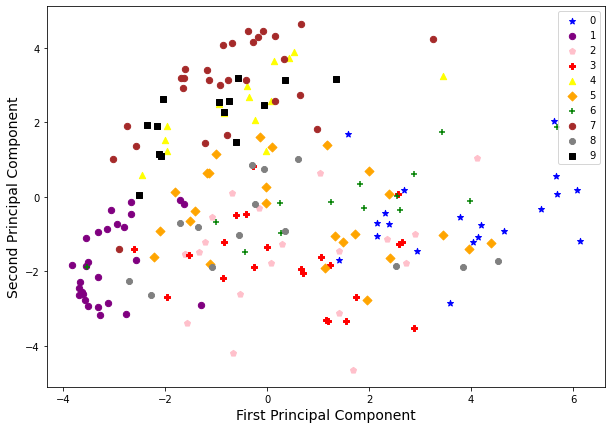

Accuracy: 0.82

------------------------------------------------------



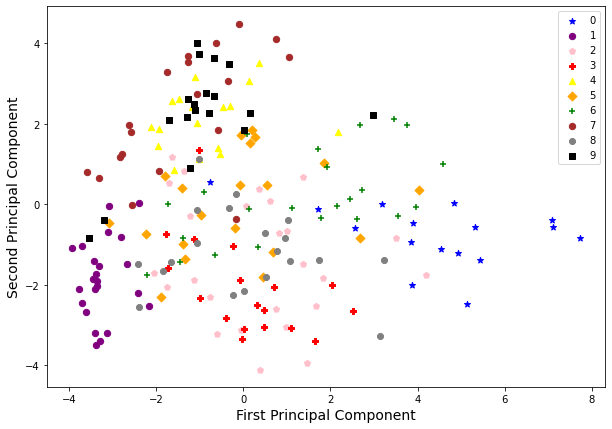

Accuracy: 0.765

------------------------------------------------------


Mean accuracy:  0.7969999999999999


In [ ]:
pca5_accuracy = RF_KernelPCA(X,y, pca_comp=5)

New pca data:  (1000, 7)
KFold(n_splits=5, random_state=None, shuffle=True)

------------------------------------------------------



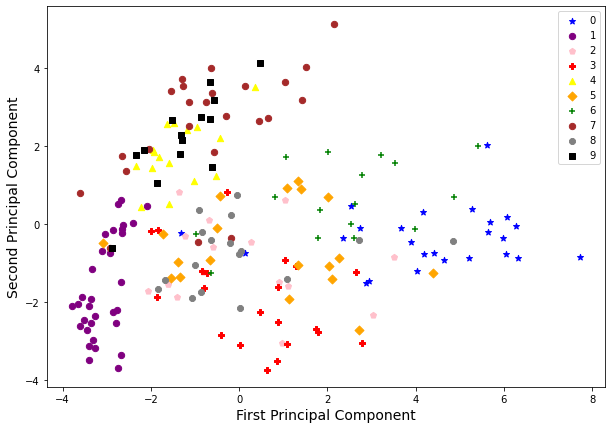

Accuracy: 0.77

------------------------------------------------------



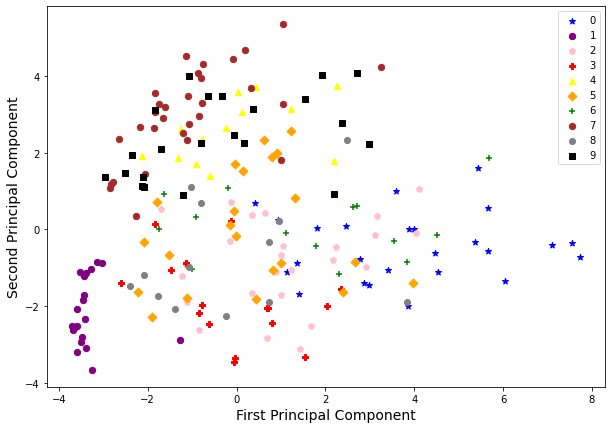

Accuracy: 0.815

------------------------------------------------------



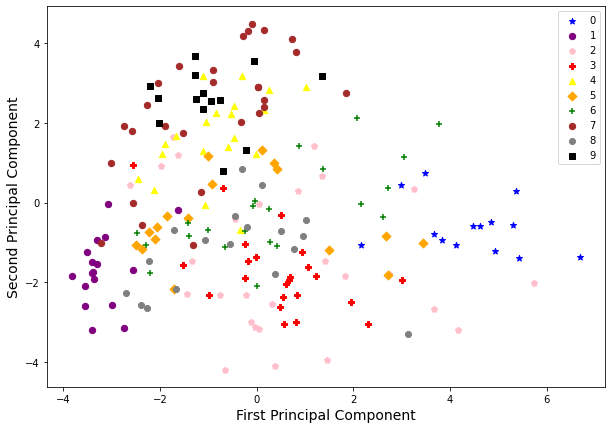

Accuracy: 0.81

------------------------------------------------------



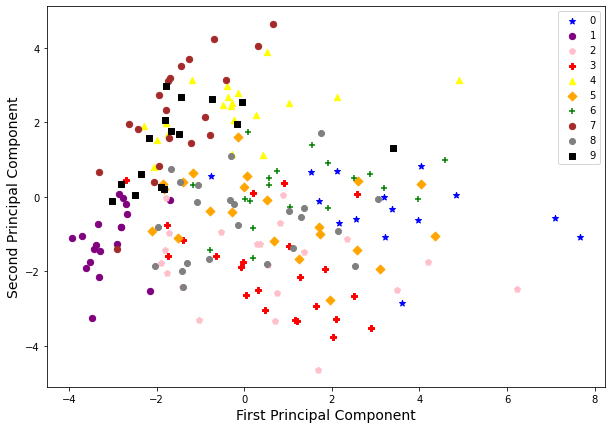

Accuracy: 0.75

------------------------------------------------------



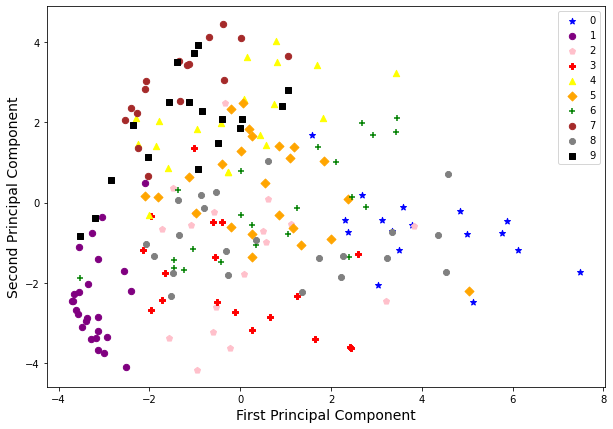

Accuracy: 0.825

------------------------------------------------------


Mean accuracy:  0.7939999999999999


In [ ]:
pca15_accuracy = RF_KernelPCA(X,y, pca_comp=15)

New pca data:  (1000, 7)
KFold(n_splits=5, random_state=None, shuffle=True)

------------------------------------------------------



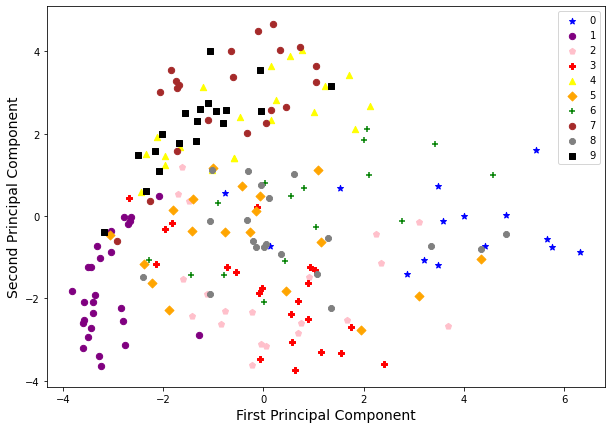

Accuracy: 0.79

------------------------------------------------------



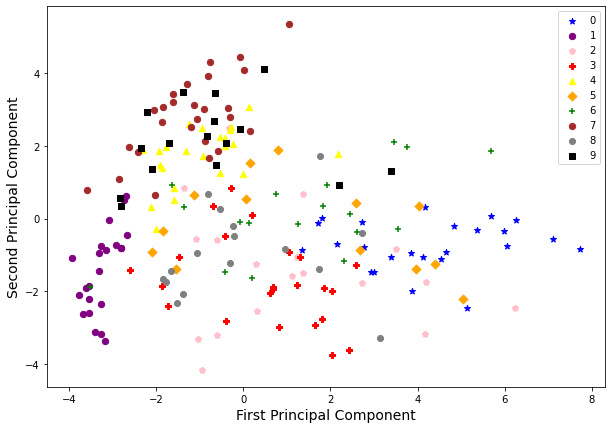

Accuracy: 0.805

------------------------------------------------------



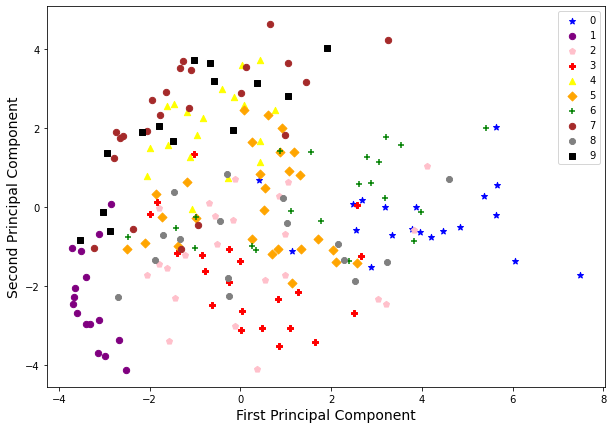

Accuracy: 0.765

------------------------------------------------------



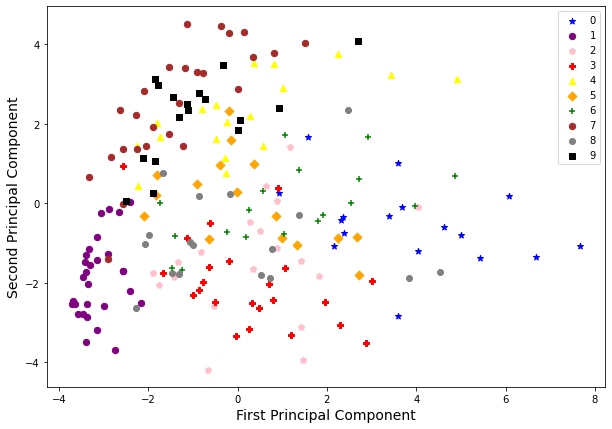

Accuracy: 0.825

------------------------------------------------------



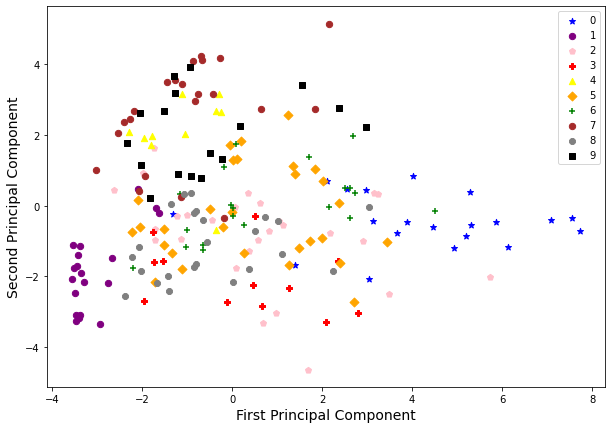

Accuracy: 0.785

------------------------------------------------------


Mean accuracy:  0.7940000000000002


In [ ]:
pca25_accuracy = RF_KernelPCA(X,y, pca_comp=25)

New pca data:  (1000, 7)
KFold(n_splits=5, random_state=None, shuffle=True)

------------------------------------------------------



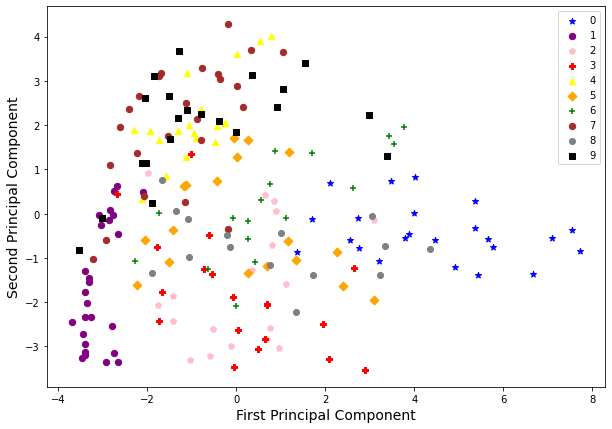

Accuracy: 0.795

------------------------------------------------------



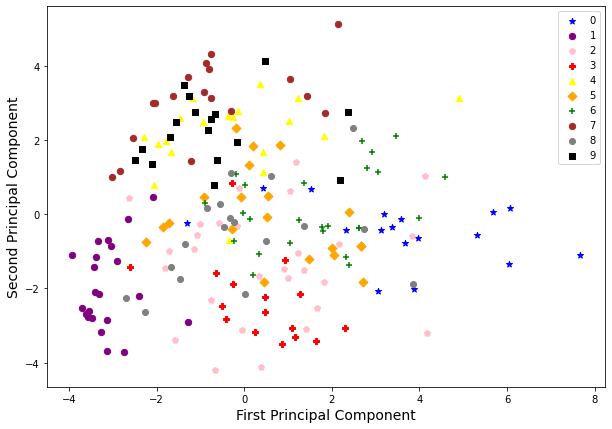

Accuracy: 0.805

------------------------------------------------------



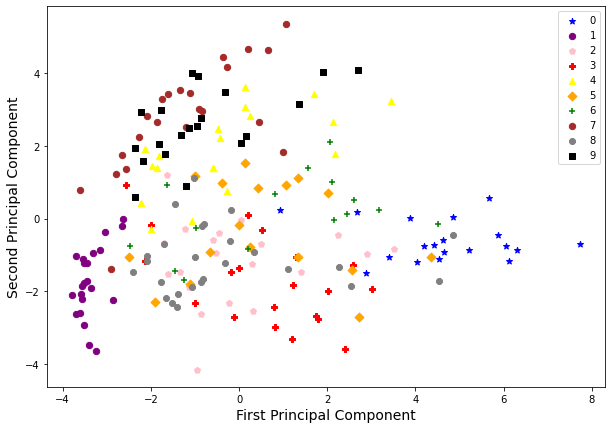

Accuracy: 0.76

------------------------------------------------------



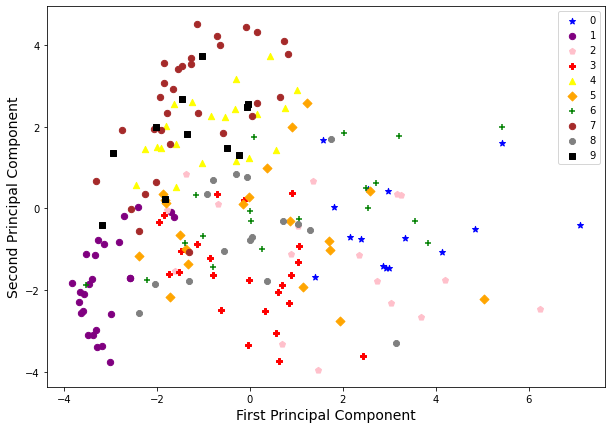

Accuracy: 0.775

------------------------------------------------------



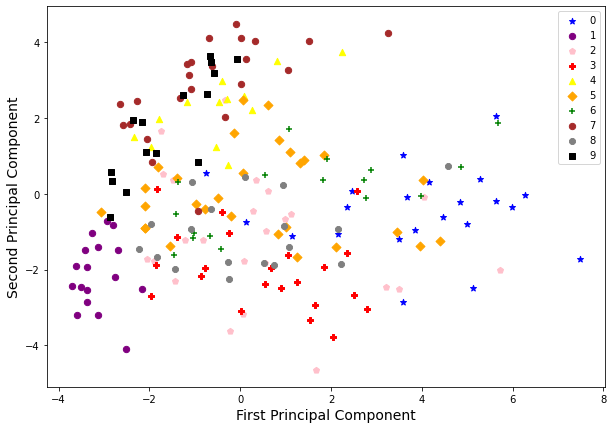

Accuracy: 0.78

------------------------------------------------------


Mean accuracy:  0.783


In [ ]:
pca50_accuracy = RF_KernelPCA(X,y, pca_comp=50)

In [ ]:
print("KernelPCA results; \n\tPCA 5  -> {} \n\tPCA 15 -> {} \n\tPCA 25 -> {} \n\tPCA 50 -> {}".format(pca5_accuracy, pca15_accuracy, pca25_accuracy, pca50_accuracy))

KernelPCA results; 
	PCA 5  -> 0.7969999999999999 
	PCA 15 -> 0.7939999999999999 
	PCA 25 -> 0.7940000000000002 
	PCA 50 -> 0.783
